In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import env

# Exercises

    file name: time_series_anomaly_detection.py or time_series_anomaly_detection.ipynb

The dataset for these exercises lives in the Codeup Data Science MySQL Server. The database name is curriculum_logs.

Hint: You will need to explore the database (yay SQL!)

    Label students by the program they are in. 
        - DONE when left joined tables, User Id, Cohort Name, and Program are in same table
    Is it possible to identify the user_id of a staff member?
        - YES. "Staff" is a value in the 'name' column. The staff accessed the data 84,031 times 
    Identify students who are accessing our curriculum pages beyond the end of their time at Codeup.
        -SEE BELOW cell 25ish
    Identify students who present anomalous activity using the Bollinger Band method, but reduce K to 2.
        -SEE BELOW cell 52ish
    Plot the access activity of these students.
        -SEE BELOW cell cell 53ish
BONUS: Can you identify users who are viewing both the web dev and data science curriculum?


## Acquire


# Exercise Prompt
obtain students user_id and program in the same table per exercise prompt

In [2]:
# url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'
# query = '''
# select * FROM logs LEFT JOIN cohorts ON logs.cohort_id = cohorts.id;
# '''
# df = pd.read_sql(query, url)
# df.head()

In [3]:
#df.to_csv('logs.csv')

In [4]:
df = pd.read_csv('logs.csv')

In [5]:
df.head() # cohort_name instead of name, path as endpoint, ip as source_ip, user_id as user

,Unnamed: 0,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
1,1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2,2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
3,3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
4,4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0


## Prepare

In [6]:
df.date = pd.to_datetime(df.date)
df = df.set_index(df.date)

In [7]:
pages = df['ip'].resample('d').count()
pages.head()

date
2018-01-26    572
2018-01-27    230
2018-01-28    170
2018-01-29    830
2018-01-30    652
Freq: D, Name: ip, dtype: int64

<AxesSubplot:xlabel='date'>

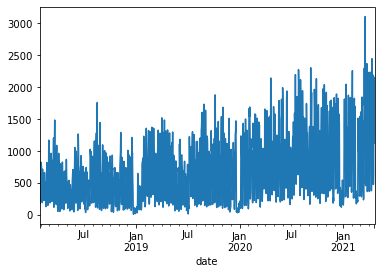

In [8]:
pages.plot()

In [9]:
df.deleted_at.value_counts()

Series([], Name: deleted_at, dtype: int64)

In [10]:
df = df.drop(columns = ['cohort_id', 'id', 'deleted_at'])

In [11]:
df = df.drop(columns = 'Unnamed: 0')

In [12]:
df.head()

,date,time,path,user_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


In [13]:
col = df.columns

In [14]:
for c in col:
    print(c)
    print (df[c].value_counts())

date
2021-03-19    3104
2021-04-12    2446
2021-03-25    2369
2020-09-08    2304
2021-03-16    2298
              ... 
2018-12-29      32
2018-12-22      30
2018-12-30      21
2019-07-04      16
2018-12-23      10
Name: date, Length: 1182, dtype: int64
time
09:03:00    81
09:01:59    79
09:02:45    75
09:02:16    75
09:05:45    74
            ..
04:58:23     1
04:58:29     1
04:58:30     1
04:58:31     1
07:28:59     1
Name: time, Length: 73167, dtype: int64
path
/                                                               50313
search/search_index.json                                        19519
javascript-i                                                    18983
toc                                                             18297
java-iii                                                        13733
                                                                ...  
javascript/loops                                                    1
content/control-structures-ii             

# Exercise Prompt
staff is in 'name' column

In [15]:
df.program_id.value_counts()

2.0    713365
3.0    103412
1.0     30548
4.0         5
Name: program_id, dtype: int64

In [16]:
# for this hmwk assignment I am dropping a few more columns

In [17]:
df.head()

,date,time,path,user_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


In [18]:
df = df.drop(columns = ['date', 'slack', 'created_at', 'updated_at'])

In [19]:
df.head()

,time,path,user_id,ip,name,start_date,end_date,program_id
date,,,,,,,,
2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0


# Exercise Prompt
Identify students who are accessing our curriculum pages beyond the end of their time at Codeup.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 to 2021-04-21
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        900223 non-null  object 
 1   path        900222 non-null  object 
 2   user_id     900223 non-null  int64  
 3   ip          900223 non-null  object 
 4   name        847330 non-null  object 
 5   start_date  847330 non-null  object 
 6   end_date    847330 non-null  object 
 7   program_id  847330 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 61.8+ MB


In [21]:
df.start_date = pd.to_datetime(df.start_date)

In [22]:
df.end_date = pd.to_datetime(df.end_date)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 to 2021-04-21
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time        900223 non-null  object        
 1   path        900222 non-null  object        
 2   user_id     900223 non-null  int64         
 3   ip          900223 non-null  object        
 4   name        847330 non-null  object        
 5   start_date  847330 non-null  datetime64[ns]
 6   end_date    847330 non-null  datetime64[ns]
 7   program_id  847330 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 61.8+ MB


In [24]:
df_cont_access =  df[df.index > df.end_date]

In [25]:
pd.unique(df_cont_access.user_id)

array([  1,  11,  21,  26,  37,  40,  50,  51,  53,  60,  64,  66,  67,
        68,  69,  70,  71,  72,  75,  76,  77,  80,  81,  82,  83,  84,
        85,  87,  90,  91,  92,  93,  94,  95,  96,  97,  98, 101, 102,
        16,  42,  41,  17,  22,  15, 104,  47,  57,  10, 105, 106,  28,
       107,  65,  52,  33,  56, 108,  27,  38,  36, 109, 110, 112, 113,
       114, 115, 139, 140, 141, 143, 144, 146, 147, 148, 149, 150, 151,
       152, 153, 156, 161, 162, 163, 164, 165, 167, 168, 169, 170, 172,
       173, 174, 175, 177, 178, 179,  29,  19, 180,   6,  99,  43,  31,
         7, 181, 138,  35, 142,   5, 155, 154,  88, 209, 210,  18,   3,
        20, 118, 211, 212, 214, 216, 217, 131, 135, 128, 127, 124, 130,
       159,  12, 145, 241, 242, 136, 157, 171, 123,  25, 134, 119, 243,
       244, 245, 246, 160, 248, 252, 254, 255, 120, 257, 279, 280, 281,
        14, 253, 188, 186, 283, 184, 215, 278, 183, 204, 193, 195, 197,
       249, 206, 284, 121, 201, 285, 286, 311, 190, 312, 116, 20

# Exercise Prompt
Identify students who present anomalous activity using the Bollinger Band method, but reduce K to 2.

In [26]:
stud_group = df.groupby('user_id')

In [27]:
stud_group.count()

,time,path,ip,name,start_date,end_date,program_id
user_id,,,,,,,
1,7404,7404,7404,7404,7404,7404,7404
2,1541,1541,1541,1541,1541,1541,1541
3,1562,1562,1562,1562,1562,1562,1562
4,692,692,692,692,692,692,692
5,1701,1701,1701,1701,1701,1701,1701
...,...,...,...,...,...,...,...
977,86,86,86,86,86,86,86
978,55,55,55,55,55,55,55
979,127,127,127,127,127,127,127


# First, overall view:

## Bollinger Bands

- A volatility indicator commonly used in stock market, forex, and cryptocurrency trading.
- Made up of 3 lines, the Upper Band (UB), the Lower Band (LB) and the Midband.
- Based on the exponential moving average

### Midband

The Exponential Moving Average

`midband = train.ewm(span=30).mean()`

### Upper & Lower Band

UB/LB = Midband +/- stdev * K

`stdev = train.ewm(span=30).std()`

K = the number of standard deviations to go up and down from the EMA

### %b, Percent Bandwidth

Shows where the last value sits in relation to the bands.

%b = last−LB / UB-LB

- If %b > 1, data point lies above the upper band
- If %b < 0, data point lies below the lower band
- If %b == .5, data point lies on the midband.

### Bandwidth

The width of the bands

Bandwidth = (UB-LB) / midband

In [28]:
# set the window span
span = 25

# compute midband
midband = pages.ewm(span=span).mean()

midband.head()

date
2018-01-26    572.000000
2018-01-27    394.160000
2018-01-28    313.385928
2018-01-29    458.433994
2018-01-30    503.578478
Freq: D, Name: ip, dtype: float64

In [29]:
# compute exponential stdev
stdev = pages.ewm(span=span).std()

stdev.head()


date
2018-01-26           NaN
2018-01-27    241.830519
2018-01-28    213.263404
2018-01-29    318.031921
2018-01-30    284.866086
Freq: D, Name: ip, dtype: float64

In [30]:
# compute upper and lower bands
# Use k = 2 per prompt
ub = midband + stdev*2
lb = midband - stdev*2
ub, lb

(date
 2018-01-26            NaN
 2018-01-27     877.821038
 2018-01-28     739.912735
 2018-01-29    1094.497836
 2018-01-30    1073.310651
                  ...     
 2021-04-17    2809.695271
 2021-04-18    2746.968387
 2021-04-19    2834.461552
 2021-04-20    2855.127364
 2021-04-21    2784.888595
 Freq: D, Name: ip, Length: 1182, dtype: float64,
 date
 2018-01-26           NaN
 2018-01-27    -89.501038
 2018-01-28   -113.140880
 2018-01-29   -177.629849
 2018-01-30    -66.153695
                  ...    
 2021-04-17   -136.733038
 2021-04-18   -178.234017
 2021-04-19   -131.629826
 2021-04-20    -63.282695
 2021-04-21    -33.801208
 Freq: D, Name: ip, Length: 1182, dtype: float64)

In [31]:
# concatenate ub and lb together into one df, bb
bb = pd.concat([ub, lb], axis=1)

bb.columns = ['ub', 'lb']
bb.head()

,ub,lb
date,,
2018-01-26,NaN,NaN
2018-01-27,877.821038,-89.501038
2018-01-28,739.912735,-113.140880
2018-01-29,1094.497836,-177.629849
2018-01-30,1073.310651,-66.153695


In [32]:
# add pages and midband to table. axis =1 adds them as columns
my_df = pd.concat([pages, midband, bb], axis=1)
my_df.columns = ['pages', 'midband', 'ub', 'lb']
my_df.head()

,pages,midband,ub,lb
date,,,,
2018-01-26,572,572.000000,NaN,NaN
2018-01-27,230,394.160000,877.821038,-89.501038
2018-01-28,170,313.385928,739.912735,-113.140880
2018-01-29,830,458.433994,1094.497836,-177.629849
2018-01-30,652,503.578478,1073.310651,-66.153695


### Plot the bands

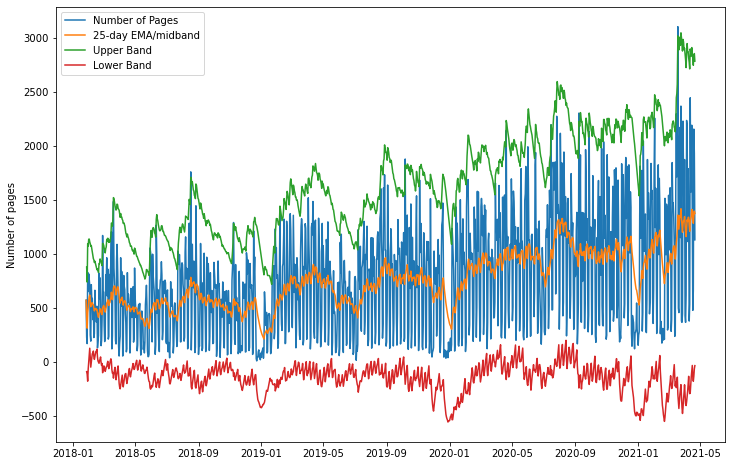

In [33]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(my_df.index, my_df.pages, label='Number of Pages')

ax.plot(my_df.index, my_df.midband, label = '25-day EMA/midband')
ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
ax.plot(my_df.index, my_df.lb, label = 'Lower Band')

ax.legend(loc='best')
ax.set_ylabel('Number of pages')

plt.show()

# Individual Views for anomolies

k = weight = 2 per prompt

In [34]:
df.user_id.unique();

In [35]:
df.rename(columns = {'path':'endpoint', 'user_id':'user', 'ip':'source_ip', 'name':'cohort_name'}, inplace =True)



In [36]:
df.head(100)

,time,endpoint,user,source_ip,cohort_name,start_date,end_date,program_id
date,,,,,,,,
2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0
...,...,...,...,...,...,...,...,...
2018-01-26,11:29:19,javascript-i/introduction/working-with-data-ty...,23,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0
2018-01-26,11:30:32,javascript-i/functions,6,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0
2018-01-26,11:30:46,/,3,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 to 2021-04-21
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   time         900223 non-null  object        
 1   endpoint     900222 non-null  object        
 2   user         900223 non-null  int64         
 3   source_ip    900223 non-null  object        
 4   cohort_name  847330 non-null  object        
 5   start_date   847330 non-null  datetime64[ns]
 6   end_date     847330 non-null  datetime64[ns]
 7   program_id   847330 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 61.8+ MB


In [38]:
df_na = df.dropna()

In [39]:
df_na[df_na.endpoint.str.contains('ds')].tail(100)

,time,endpoint,user,source_ip,cohort_name,start_date,end_date,program_id
date,,,,,,,,
2021-04-20,12:10:14,java-iii/passwords,827,96.8.248.15,Luna,2020-12-07,2021-06-08,2.0
2021-04-20,12:14:40,examples/css/bootstrap-grids.html,938,192.171.117.210,Neptune,2021-03-15,2021-09-03,2.0
2021-04-20,13:43:42,jquery/essential-methods/attributes-and-css,888,162.200.119.143,Marco,2021-01-25,2021-07-19,2.0
2021-04-20,13:43:55,jquery/essential-methods/traversing,888,162.200.119.143,Marco,2021-01-25,2021-07-19,2.0
2021-04-20,13:43:59,jquery/essential-methods/attributes-and-css,888,162.200.119.143,Marco,2021-01-25,2021-07-19,2.0
...,...,...,...,...,...,...,...,...
2021-04-21,16:04:20,java-i/methods,64,71.150.217.33,Staff,2014-02-04,2014-02-04,2.0
2021-04-21,16:05:41,java-i/methods,64,71.150.217.33,Staff,2014-02-04,2014-02-04,2.0
2021-04-21,16:30:45,jquery/essential-methods/attributes-and-css,869,136.50.98.51,Marco,2021-01-25,2021-07-19,2.0


In [40]:
df.user.unique();

%b, Percent Bandwidth¶

Shows where the last value sits in relation to the bands.

%b = value−LB / UB-LB

    If %b > 1, data point lies above the upper band
    If %b < 0, data point lies below the lower band
    If %b == .5, data point lies on the midband.


In [41]:
def one_user_df_prep(df, user):
    '''
    This function returns a dataframe consisting of data for only a single defined user
    '''
    #filters data frame to only show one user at a time
    df = df[df.user == user]
    #counts how many pulls per day for the single user mentioned above
    # note 'endpoint' has no meaning. just needed a column to resample and count by
    # the real meaning is pulls per day per user which is df.user==user and resample('d').count()
    pages_one_user = df['endpoint'].resample('d').count()
    return pages_one_user

In [42]:
l = one_user_df_prep(df, 1)

In [43]:
l

date
2018-01-26     7
2018-01-27     1
2018-01-28     0
2018-01-29     6
2018-01-30     5
              ..
2021-04-17     0
2021-04-18     8
2021-04-19    10
2021-04-20    11
2021-04-21    12
Freq: D, Name: endpoint, Length: 1182, dtype: int64

Upper & Lower Band

UB/LB = Midband +/- stdev * K

stdev = train.ewm(span=30).std()

K = the number of standard deviations to go up and down from the EMA

In [44]:
def compute_pct_b(pages_one_user, span, weight, user):
    ############# single user, ewm(span), weight = K, user #
    '''
    This function adds the %b of a bollinger band range for the page views of a single user's log activity
    '''
    # Calculate upper and lower bollinger band-these are just standard equations
    midband = pages_one_user.ewm(span=span).mean()
    stdev = pages_one_user.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    
    # Add upper and lower band values to dataframe-combining data succinctly into a dataframe
    bb = pd.concat([ub, lb], axis=1)
    
    # Combine all data into a single dataframe - keep comibining
    my_df = pd.concat([pages_one_user, midband, bb], axis=1)
    my_df.columns = ['pages_one_user', 'midband', 'ub', 'lb']
    
    # Calculate percent b and relevant user id to dataframe
    # eqn for %b
    my_df['pct_b'] = (my_df['pages_one_user'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    # add column to display user id
    my_df['user'] = user
    return my_df

In [45]:
compute_pct_b(l, 30, 2, 1)

,pages_one_user,midband,ub,lb,pct_b,user
date,,,,,,
2018-01-26,7,7.000000,NaN,NaN,NaN,1
2018-01-27,1,3.900000,12.385281,-4.585281,0.329116,1
2018-01-28,0,2.512403,9.978877,-4.954072,0.331754,1
2018-01-29,6,3.473363,10.465263,-3.518537,0.680683,1
2018-01-30,5,3.820710,9.941925,-2.300505,0.596328,1
...,...,...,...,...,...,...
2021-04-17,0,8.666278,34.752849,-17.420294,0.333894,1
2021-04-18,8,8.623292,33.856529,-16.609946,0.487649,1
2021-04-19,10,8.712112,33.127499,-15.703276,0.526375,1


In [46]:
def find_anomalies(df, user, span, weight, plot=False):
    '''
    This function returns the records where a user's daily activity exceeded the upper limit of a bollinger band range
    '''
    
    # Reduce dataframe to represent a single user-see earlier function
    pages_one_user = one_user_df_prep(df, user)
    
    # Add bollinger band data to dataframe
    my_df = compute_pct_b(pages_one_user, span, weight, user)
    
    # Plot data if requested (plot=True)
    if plot:
        plot_bands(my_df, user)
    
    # Return records that sit outside of bollinger band upper/lower limit
    #note: we don't expect any below the lower limit based on what we saw in the overall graph
    # the lower limit is 2(sigma) which happens to result in '-' values
    # but you can't have '-' of pulls
    return my_df[(my_df.pct_b>1) | (my_df.pct_b<0)]

In [47]:
l = find_anomalies(df, 9, 30, 2)
l

,pages_one_user,midband,ub,lb,pct_b,user
date,,,,,,
2018-02-05,45,8.58687,38.161338,-20.987597,1.115618,9
2018-03-19,33,6.24160,26.460106,-13.976906,1.161730,9


In [48]:
# plot_bands function required no modifictions for this notebook from class notebook

In [49]:
def plot_bands(my_df, user):
    '''
    This function plots the bolliger bands of the page views for a single user
    '''
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(my_df.index, my_df.pages_one_user, label='Number of Pages, User: '+str(user))
    ax.plot(my_df.index, my_df.midband, label = 'EMA/midband')
    ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
    ax.plot(my_df.index, my_df.lb, label = 'Lower Band')
    ax.legend(loc='best')
    ax.set_ylabel('Number of Pages')
    plt.show()

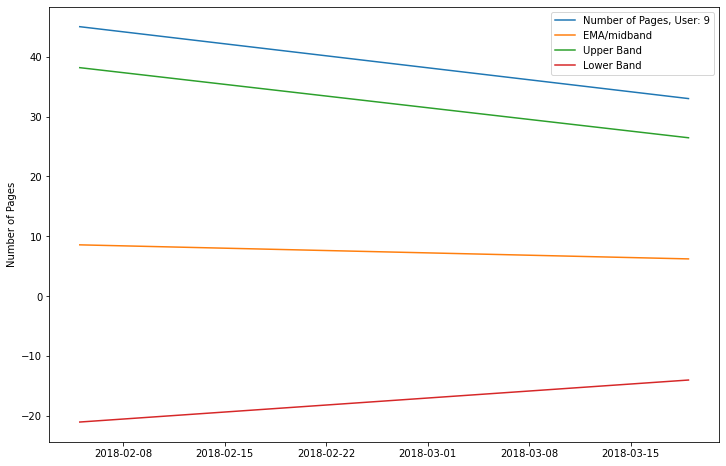

In [50]:
plot_bands(l, 9)

# Verified they all work in my notebook on a single input. Now, trying for list of input

In [51]:
span = 30
weight = 2

anomalies = pd.DataFrame()
for u in list(df.user.unique()):
    user_df = find_anomalies(df, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)

In [52]:
anomalies # with K = weight = 2

,pages_one_user,midband,ub,lb,pct_b,user
date,,,,,,
2018-02-20,54,6.456745,35.718248,-22.804758,1.312386,1
2018-03-19,35,9.304089,32.368632,-13.760453,1.057044,1
2018-05-04,27,7.179313,24.736171,-10.377545,1.064471,1
2018-05-11,27,8.141119,26.687629,-10.405390,1.008421,1
2018-05-29,68,9.612443,44.787234,-25.562347,1.329963,1
...,...,...,...,...,...,...
2021-03-29,28,6.004114,24.426496,-12.418268,1.096988,948
2021-04-17,25,8.260254,23.336345,-6.815837,1.055175,948
2021-04-18,50,11.264267,37.649246,-15.120712,1.234049,948


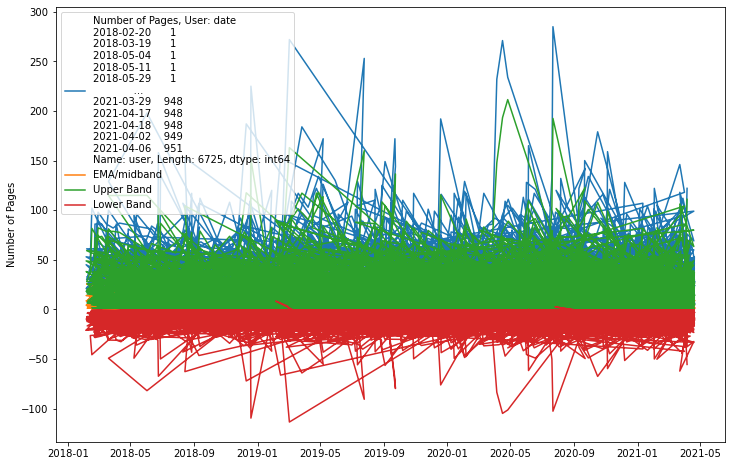

In [53]:
plot_bands(anomalies, anomalies.user)

# Original code from class
- all won't work in this notebook due to minor differences in names and prepare
- fuctions used in this notebook are modified versions of those below

### Compute %b for individual users

In [54]:
def one_user_df_prep(df, user):
    '''
    This function returns a dataframe consisting of data for only a single defined user
    '''
    df = df[df.user_id == user]
    df.date = pd.to_datetime(df.date)
    df = df.set_index(df.date)
    pages_one_user = df['endpoint'].resample('d').count()
    return pages_one_user

In [55]:
def compute_pct_b(pages_one_user, span, weight, user):
    '''
    This function adds the %b of a bollinger band range for the page views of a single user's log activity
    '''
    # Calculate upper and lower bollinger band
    midband = pages_one_user.ewm(span=span).mean()
    stdev = pages_one_user.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    
    # Add upper and lower band values to dataframe
    bb = pd.concat([ub, lb], axis=1)
    
    # Combine all data into a single dataframe
    my_df = pd.concat([pages_one_user, midband, bb], axis=1)
    my_df.columns = ['pages_one_user', 'midband', 'ub', 'lb']
    
    # Calculate percent b and relevant user id to dataframe
    my_df['pct_b'] = (my_df['pages_one_user'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    my_df['user_id'] = user
    return my_df

In [56]:
def plot_bands(my_df, user):
    '''
    This function plots the bolliger bands of the page views for a single user
    '''
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(my_df.index, my_df.pages_one_user, label='Number of Pages, User: '+str(user))
    ax.plot(my_df.index, my_df.midband, label = 'EMA/midband')
    ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
    ax.plot(my_df.index, my_df.lb, label = 'Lower Band')
    ax.legend(loc='best')
    ax.set_ylabel('Number of Pages')
    plt.show()

In [57]:
def find_anomalies(df, user, span, weight, plot=False):
    '''
    This function returns the records where a user's daily activity exceeded the upper limit of a bollinger band range
    '''
    
    # Reduce dataframe to represent a single user
    pages_one_user = one_user_df_prep(df, user)
    
    # Add bollinger band data to dataframe
    my_df = compute_pct_b(pages_one_user, span, weight, user)
    
    # Plot data if requested (plot=True)
    if plot:
        plot_bands(my_df, user)
    
    # Return only records that sit outside of bollinger band upper limit
    return my_df[my_df.pct_b>1]